# Plot losses and development scores

In [95]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [96]:
MODEL_DIR = '../models'
TEMP_DIR = 'temp'

In [102]:
def get_all_folders():

    all_folders = [d for d in os.listdir(MODEL_DIR)
        if os.path.isdir(os.path.join(MODEL_DIR, d))
        and d != TEMP_DIR]
    
    return all_folders

def filter_folders(folders, name, include=[], exclude=[]):
    assert isinstance(include, list)
    assert isinstance(exclude, list)
    
    filtered = []
    for folder in folders:
        folder = folder.split('_')
        if folder[0] == name:
            if all(name in folder for name in include) and all(not name in folder for name in exclude):
                filtered.append('_'.join(folder))
    if not filtered:
        filtered.append('')

    return filtered

# Load losses csv

In [ ]:
def get_losses_as_dataframe(name, include=[], exclude=[], smooth=1):

    filtered_folders = filter_folders(get_all_folders(), name, include)

    loss_dfs = [pd.read_csv(os.path.join(MODEL_DIR, folder, 'log', 'loss.csv')).rolling(smooth).mean()
                for folder in filtered_folders]

    for df, name in zip(loss_dfs, filtered_folders):
        df['update'] = range(1, len(df) + 1)
        df['name'] = name

    return pd.concat(loss_dfs)


def get_losses_as_numpy_array(name, include=[], exclude=[]):
    
    filtered_folders = filter_folders(get_all_folders(), name, include)

    loss_arrays = [pd.read_csv(os.path.join(MODEL_DIR, folder, 'log', 'loss.csv')).as_matrix()
                   for folder in filtered_folders]
    
    length = min(map(len, loss_arrays))
    loss_arrays = [array[:length] for array in loss_arrays]
    
    return np.hstack(loss_arrays).T
    

array([62.91944177, 85.39225404, 58.25601088, ...,  9.72415012,
       35.36814611, 49.12380033])

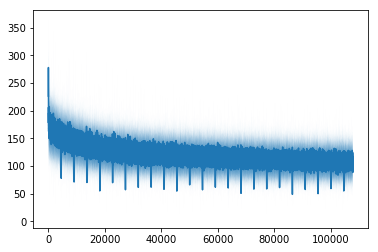

In [10]:
lm_loss_array = get_losses_as_numpy_array('lm', include=['vocab=small'])

lm_loss_array.shape

lm_loss_mean = lm_loss_array.mean(0)
lm_loss_std = 2 * np.sqrt(lm_loss_array.var(0))

plt.plot(lm_loss_mean)
plt.fill_between(range(len(lm_loss_mean)), lm_loss_mean + lm_loss_std, lm_loss_mean - lm_loss_std, alpha=0.8)
lm_loss_std

In [15]:
lm_loss_df = get_losses_as_dataframe('lm', include=['vocab=small'])
lm_loss_df

,loss,update,name
0,188.806320,1,lm_vocab=small_dev=127.77
1,310.877655,2,lm_vocab=small_dev=127.77
2,225.964462,3,lm_vocab=small_dev=127.77
3,288.873016,4,lm_vocab=small_dev=127.77
4,260.497894,5,lm_vocab=small_dev=127.77
5,234.204300,6,lm_vocab=small_dev=127.77
6,223.629013,7,lm_vocab=small_dev=127.77
7,174.118057,8,lm_vocab=small_dev=127.77
8,221.515015,9,lm_vocab=small_dev=127.77
9,239.880646,10,lm_vocab=small_dev=127.77


In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x="update", y="loss",
             data=lm_loss_df,
             ax=ax)

# Extract from tensorboard events

In [133]:
def get_csv_from_events(folder, scalar_name):

    path = os.path.join(MODEL_DIR, folder)
    events = EventAccumulator(path).Reload()
    
    assert scalar_name in events.Tags()['scalars'], (events.Tags(), scalar_name)
    
    scalar_events = events.Scalars(scalar_name)

    wall_time, step, value = zip(*
        [(event.wall_time, event.step, event.value) for event in scalar_events])
    wall_time, step, value = np.array(wall_time), np.array(step), np.array(value)
    data = np.vstack([wall_time, step, value]).T

    df = pd.DataFrame(data, columns=['wall_time', 'step', 'value'])
    df['name'] = folder
    
    return df


def get_combined_csv_from_events(name, scalar_name, include=[], exclude=[]):
    
    filtered_folders = filter_folders(
        get_all_folders(), name, include, exclude)
    
    dfs = []
    for folder in filtered_folders:
        df = get_csv_from_events(folder, scalar_name)
        dfs.append(df)
    
    return pd.concatenate(dfs)

In [134]:
dev_df = get_combined_csv_from_events('lm', 'dev/pp', include=['vocab=small'])

AssertionError: ({'images': [], 'audio': [], 'histograms': [], 'scalars': [], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}, 'dev/pp')

In [ ]:
sns.lineplot(data=dev_df, x='step', y='value')